Program to build an interpolated image from  a random selection of pixels from a given image.

To do this we will take n random pixels samples from the fiven image and resconstruct the image using internpolation methods/functions.

In [1]:
import os
import sys
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
im_name = "red_sky_anime.jpg"
im = Image.open(im_name)
im.size # PIL returns size as (width, height) that is column, row which is the opposite of what numpy uses. Numpy uses (row, column) which is (height, width)

(3556, 2000)

In [3]:
im.height # this is rows

2000

In [4]:
im.width # this is cols

3556

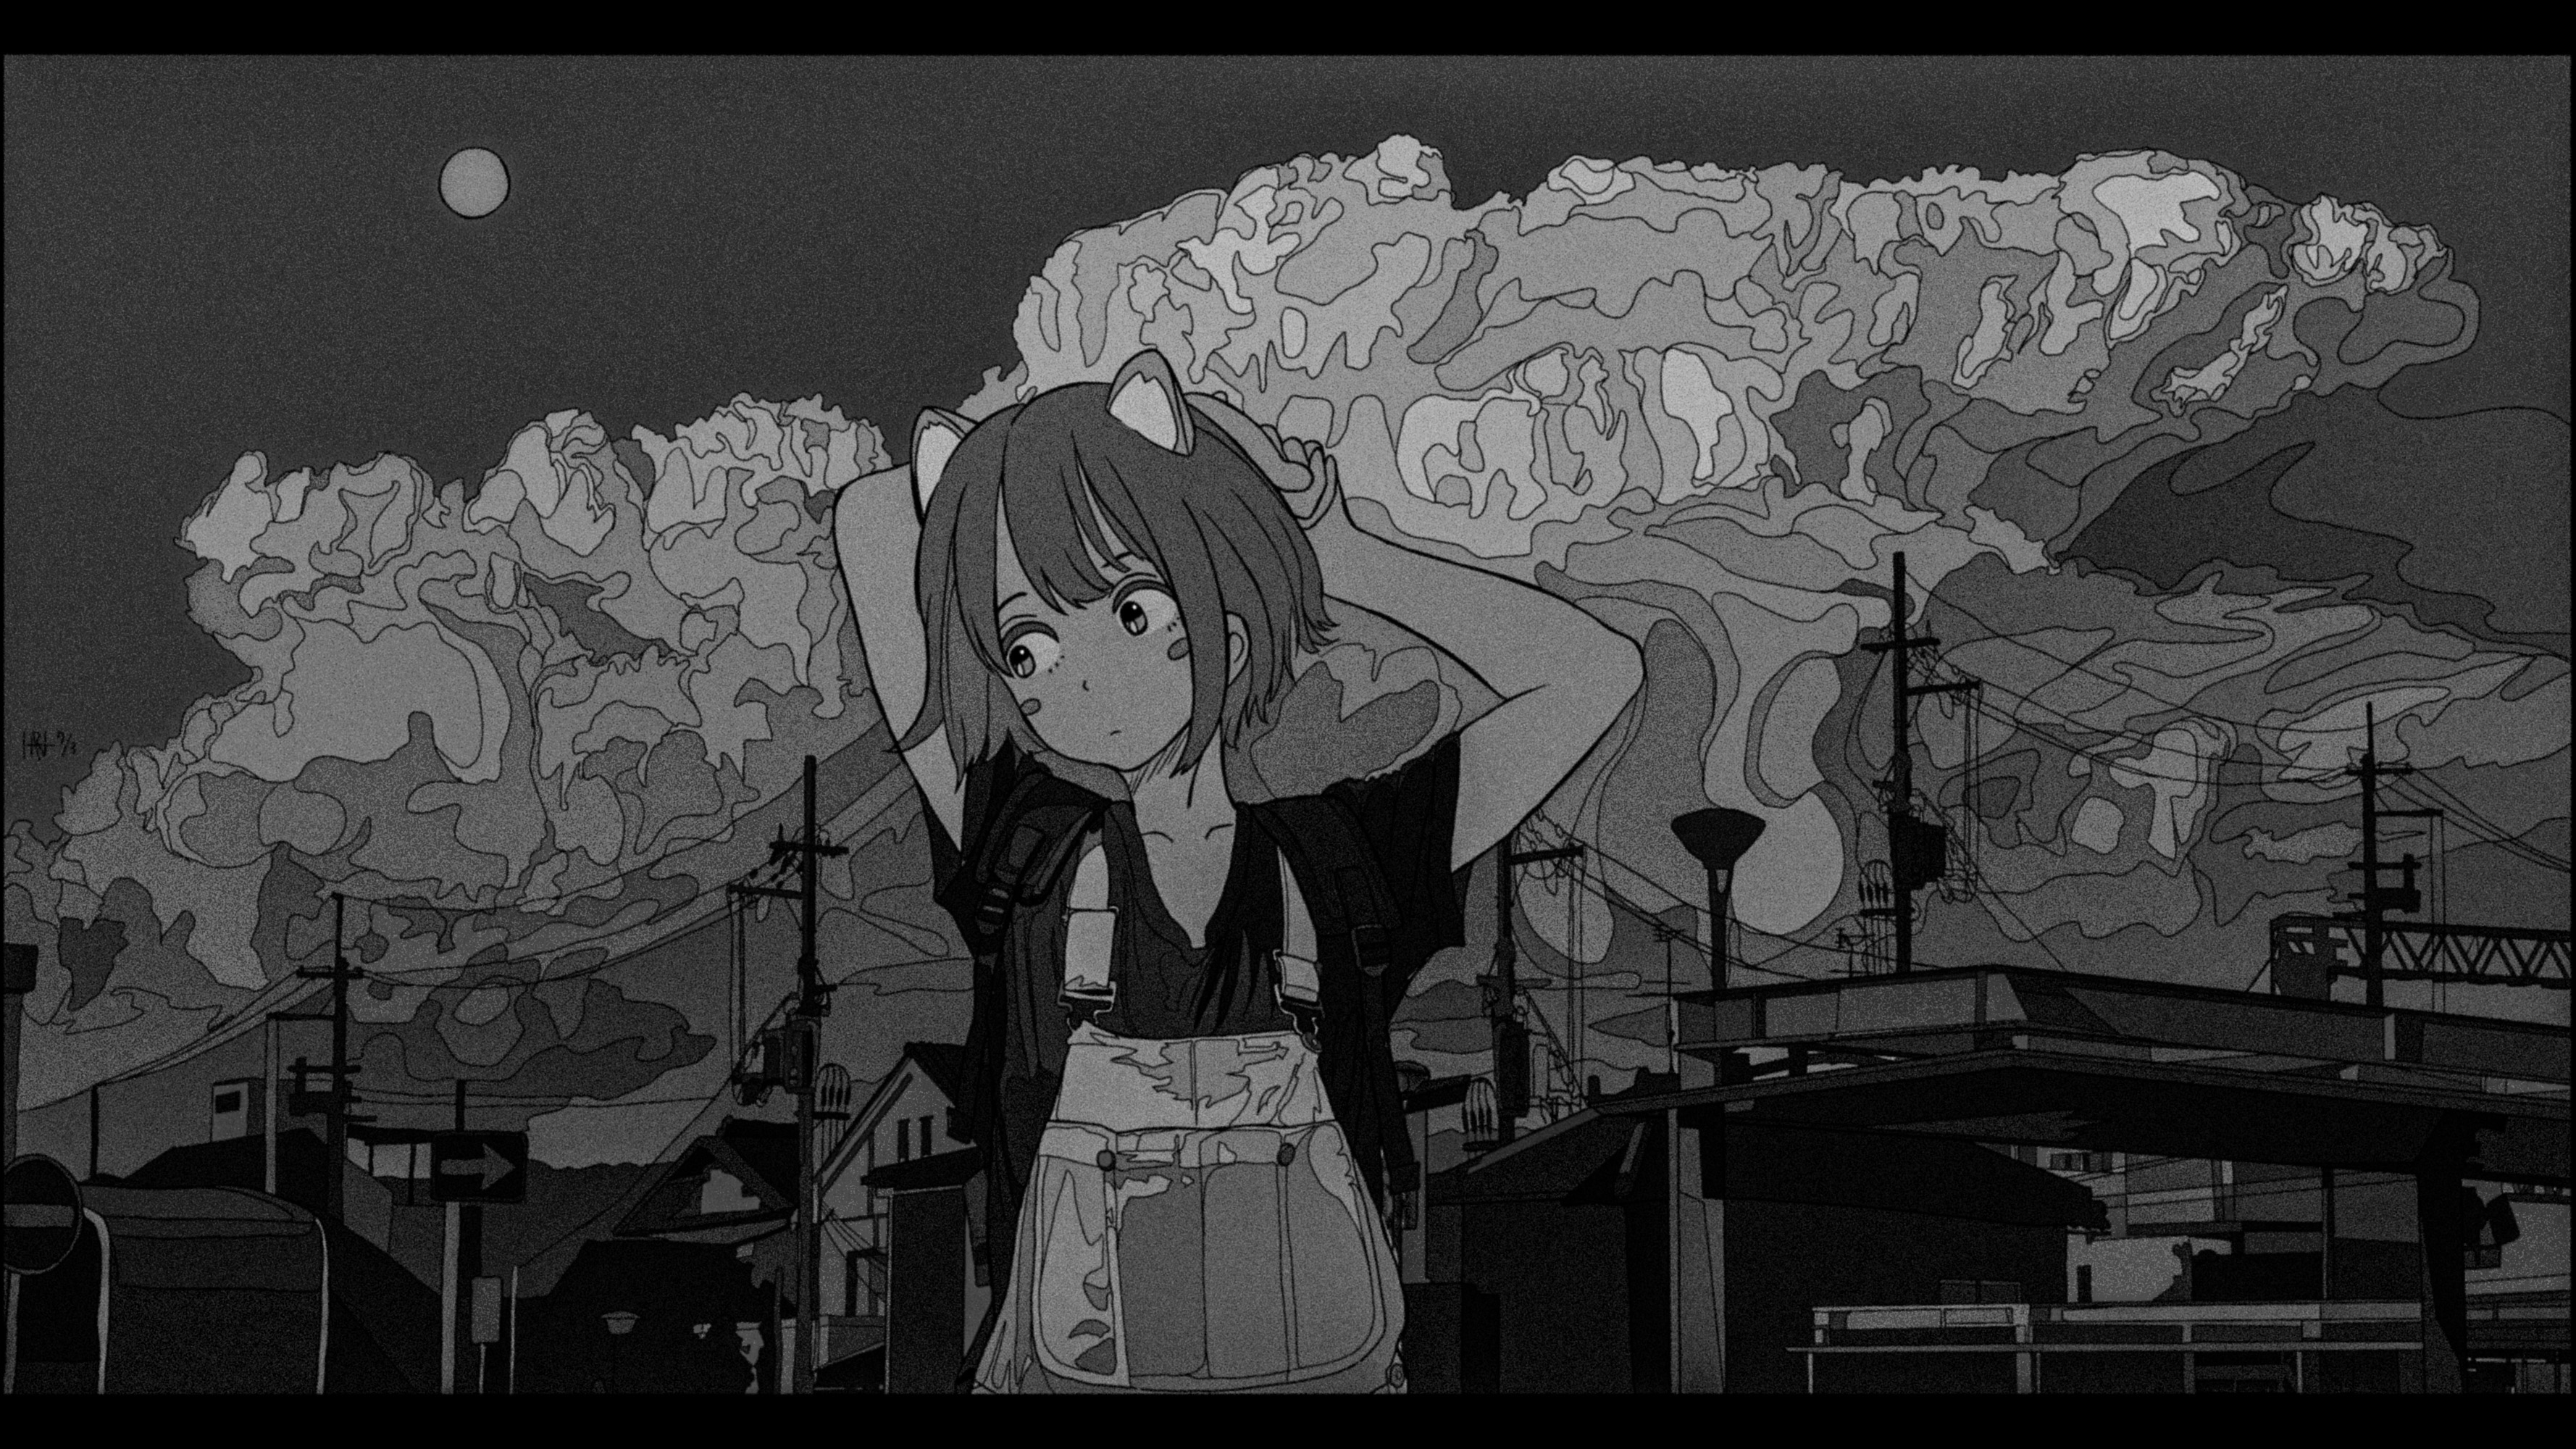

In [3]:
im.convert("L")

In [4]:
im = np.array(im.convert("L"))
im

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
im.shape # this is row, cols which is height, width

(2000, 3556)

In [13]:
# A meshrid of pixel coordinates
nx, ny = im.shape[1], im.shape[0] # extracting width and height from the shape of the image

In [15]:
np.arange(0, nx, 1), np.arange(0, nx, 1).shape

(array([   0,    1,    2, ..., 3553, 3554, 3555]), (3556,))

In [16]:
np.arange(0, ny, 1), np.arange(0, ny, 1).shape

(array([   0,    1,    2, ..., 1997, 1998, 1999]), (2000,))

In [21]:
X, Y = np.meshgrid(np.arange(0, nx, 1), np.arange(0, ny, 1))

In [22]:
X

array([[   0,    1,    2, ..., 3553, 3554, 3555],
       [   0,    1,    2, ..., 3553, 3554, 3555],
       [   0,    1,    2, ..., 3553, 3554, 3555],
       ...,
       [   0,    1,    2, ..., 3553, 3554, 3555],
       [   0,    1,    2, ..., 3553, 3554, 3555],
       [   0,    1,    2, ..., 3553, 3554, 3555]])

In [23]:
X.shape

(2000, 3556)

In [24]:
Y

array([[   0,    0,    0, ...,    0,    0,    0],
       [   1,    1,    1, ...,    1,    1,    1],
       [   2,    2,    2, ...,    2,    2,    2],
       ...,
       [1997, 1997, 1997, ..., 1997, 1997, 1997],
       [1998, 1998, 1998, ..., 1998, 1998, 1998],
       [1999, 1999, 1999, ..., 1999, 1999, 1999]])

In [26]:
Y.shape

(2000, 3556)

In [28]:
import cv2

i = 2
nrows, ncols = 2, 2
total_samples_possible = im.shape[0] * im.shape[1]
nsamples = 10**(i+2)
print("Total samples possible: ", total_samples_possible)
print("Out of which, we are taking ", nsamples, " samples")

Total samples possible:  7112000
Out of which, we are taking  10000  samples


In [29]:
ix = np.random.randint(im.shape[1], size=nsamples) # taking random samples upto the width
iy = np.random.randint(im.shape[0], size=nsamples) # taking random samples upto the height

In [30]:
ix

array([  23, 2836, 1509, ..., 3164,  881, 2348])

In [31]:
ix.shape # these are nsamples(10000) random samples upto the width

(10000,)

In [32]:
iy

array([1590,  506, 1534, ..., 1547,  971, 1399])

In [33]:
ix.shape

(10000,)

In [42]:
test_2D = np.array([[1,2,3],[4,5,6],[7,8,9]])
test_ix, test_iy = np.array([[0,1], [0,1]])
test_2D[[1,0],[0,1]]

array([4, 2])

In [43]:
test_2D

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [44]:
ix, iy # ix is for width and iy is for height. 

(array([  23, 2836, 1509, ..., 3164,  881, 2348]),
 array([1590,  506, 1534, ..., 1547,  971, 1399]))

In [45]:
samples = im[iy, ix] # this is the intensity of the image at the random samples. We do iy first because it is the row and then ix because it is the column. And slicing is done row wise first and then column wise.
samples

array([ 74, 111, 140, ...,  13, 117,  24], dtype=uint8)

In [9]:
samples.shape

(100000,)

float64


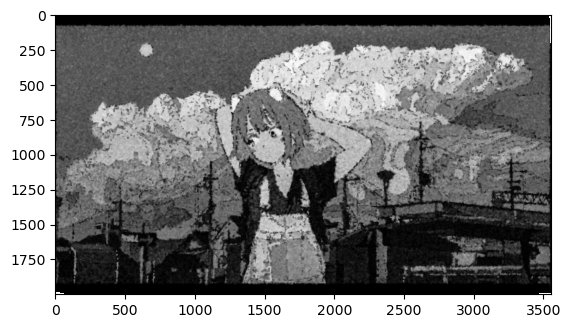

In [10]:
int_im = griddata((iy,ix), samples, (Y,X))
plt.imshow(int_im, cmap=plt.get_cmap("Greys_r"))
print(int_im.dtype)

uint8


/tmp/ipykernel_21503/1387503802.py:1: RuntimeWarning: invalid value encountered in cast
  uint8_array = (int_im).astype(np.uint8)


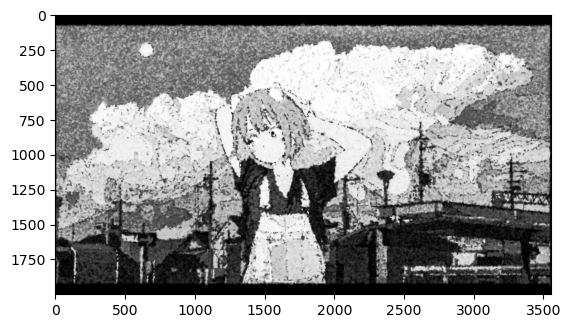

In [11]:
uint8_array = (int_im).astype(np.uint8)

equ = cv2.equalizeHist(uint8_array)
print(uint8_array.dtype)
plt.imshow(equ, cmap=plt.get_cmap("Greys_r"))

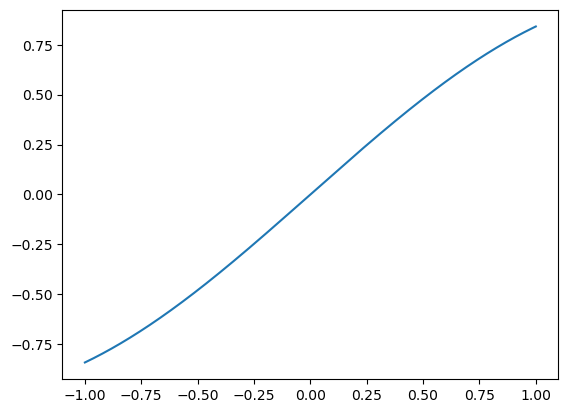

In [9]:
x = np.linspace(-1, 1, 1000)
y = np.sin(x)

plt.plot(x, y)

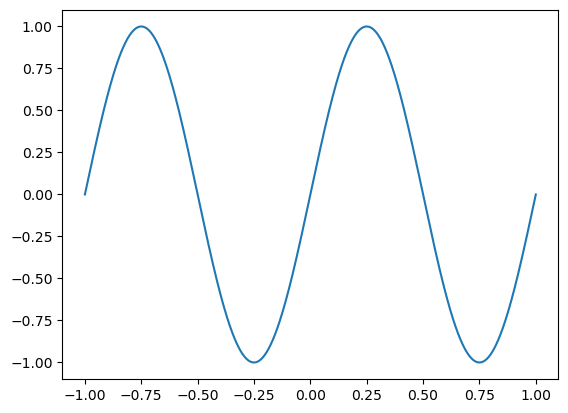

In [10]:
plt.plot(x, np.sin(2* np.pi* x))

In [11]:
x = y = np.linspace(-1, 1, 1000)